# Исследование закономерностей, определяющих успешность продукта на рынке видеоигр

Проведем исследование для интернет-магазина «Стримчик», продающего по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В ходе работы необходимо будет провести исследовательский анализ, составить портрет пользователя по каждому региону и проверить две гипотезы в финальной части проекта.
Гипотезы следующие:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## Обзор даных

Действия на данном этапе:

- открыть таблицу и изучить информацию о ней;
- изучить информацию о пропусках;

### Начало работы

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import factorial
from scipy import stats as st
import warnings # на всякий случай отключим преудпреждения
warnings.filterwarnings('ignore')

In [16]:
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [18]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Описание столбцов таблицы.

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Вывод

Первое, что можно увидеть, это названия столбоцв, написанные не в "змеином регистре". Нижние подчеркивания, разделяющие слова в составных названия присутствуют, но сами слова написаны с большой буквы. Это необходимо будет исправить. Далее можно обратить внимание на пропуски. Пропуски присутствуют в столбцах `Year_of_Release`, `Critic_Score`, `User_Score` и `Rating`. В данном случае, пропуски в столбцах с оценками заполнять нельзя, так как они могут исказить результаты дальнейших расчетов, поэтому просто заполним их нулями, чтобы избавиться от NaN. Пропуски в столбце `Rating` можно заполнить "заглушками" (например, пустыми строками) потому, что это категориальная переменная.  

## Предобработка данных

Действия на данном этапе:
- заменим названия столбцов (приведем к нижнему регистру);
- обработаем пропуски при необходимости;
- преобразуем данные в нужные типы;
- опишем причины, которые могли привести к пропускам;
- разберемся с аббревиатурой `tbd` в столбце с оценкой пользователей. Отдельно разберем это значение;
- посчитайте суммарные продажи во всех регионах и запишем их в отдельный столбец.

### Приведение названий столбцов к нижнему регистру

Приведем названия столбцов к нижнему регистру. Сделать это достаточно просто, если применить функцию `map()`, передав ей соответствующие параметры.

In [19]:
data.columns = map(str.lower, data.columns)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработка пропусков

Для дальнейшей работы на данном этапе необходимо избавиться от пропусков в данных. Замена пропусков на определенные значения может исказить результаты в дальнейшем, поэтому заменим их нулями а в некоторых случая удалим строки с пропусками.

In [20]:
data['year_of_release'] = data['year_of_release'].fillna(0)
data = data.query('year_of_release != 0')

In [21]:
data['critic_score'] = data['critic_score'].fillna(0)
data['critic_score'] = data['critic_score'].astype(int)

В столбце `user_score` присутствует значение `tbd`. Аббревиатура TBD в данном случае скорее всего обозначает "To Be Determined" (англ. "Будет определено"). Смысл здесь следующий. Скорее всего, некоторые пользователи составили мнение о какой-либо игре, но не оставили оценку на сайте. Для исследования эти данные можно считать пропусками и попросту заполнить пропущенные значения нулями.

In [22]:
data['user_score'] = data['user_score'].replace('tbd', 0)

In [23]:
data['user_score'] = data['user_score'].fillna(0)

In [24]:
a = [3,5,np.nan,2,np.nan,6]
pd.Series(a).mean()

4.0

In [25]:
b = [3,5,0,2,0,6]
pd.Series(b).mean()

2.6666666666666665

Заменим пропуски в столбце `rating` пустыми строками.

In [26]:
data['rating'] = data['rating'].fillna(' ')

Заменим типы данных на подходящие.

In [27]:
data['year_of_release'] = data['year_of_release'].astype(int)
data['user_score'] = data['user_score'].astype(float)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16446 non-null object
year_of_release    16446 non-null int64
genre              16444 non-null object
na_sales           16446 non-null float64
eu_sales           16446 non-null float64
jp_sales           16446 non-null float64
other_sales        16446 non-null float64
critic_score       16446 non-null int64
user_score         16446 non-null float64
rating             16446 non-null object
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


В таблице осталось еще 4 пропущенных значения. Отфильтруем их при помощи `query`.

In [29]:
data.dropna(subset = ['name','genre'], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null int64
user_score         16444 non-null float64
rating             16444 non-null object
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


Проверим таблицу на дубликаты т.е. на полностью индентичные друг другу строки.

In [30]:
data.duplicated().sum()

0

Выведем на экран таблицу, чтобы определиться в результатах преобразований.

In [31]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0,0.0,
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0,0.0,


### Добавление информации в таблицу

Предобработка завершена. Возможная причина появления пропусков в том, что для некоторых игр просто не выставили либо не успели выставить оценку. Теперь добавим в таблицу столбцы с суммарными продажами во всех регионах.

In [32]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [33]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,,31.38


### Вывод

Предобработка данных завершена. Названия столбцов были заменены на строчные, были удалены пропуски, в таблицу добавлен столбец с суммарным количеством продаж по каждой строке таблицы.

## Исследовательский анализ

На данном этапе необходимо проверить:
- сколько игр выпускалось в разные годы;
- посмотреть, как менялись продажи по платформам и выделить платформы с наибольшими суммарными продажами;
- выяснить какие платформы растут по продажам и выбрать несколько потенциально прибыльных;
- построить график по продажам с разбивкой по платформам;
- посмотреть, как отзыввы пользователей и критиков влияют на продажи;
- выделить самы прибыльные жанры.

### Анализ количества выпущенных игр по годам

Для того, чтобы посмотреть, сколько игр было выпущено в разное время, построим гистограмму и отбросим данные за те периоды, когда игр выпускалось совсем мало.

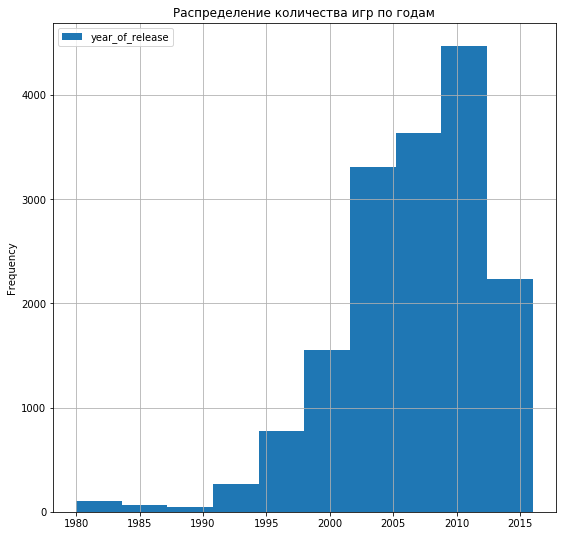

In [34]:
data.plot(y='year_of_release', kind='hist', layout=(2, 2), figsize=(9, 9), grid=True, title='Распределение количества игр по годам')

Глядя на график, можно сделать вывод, что наибольшее количество игр (более 4000) были выпущены в 2010-11 годах, а наименьшее количество игр - в 1990 году. Данные до 1993 года не представляют интереса для исследования, их можно обросить.

Перезапишем датасет основываясь на выводе выше.

In [35]:
data = data.query('year_of_release > 1993')

In [36]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,,31.38
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16079 entries, 0 to 16714
Data columns (total 12 columns):
name               16079 non-null object
platform           16079 non-null object
year_of_release    16079 non-null int64
genre              16079 non-null object
na_sales           16079 non-null float64
eu_sales           16079 non-null float64
jp_sales           16079 non-null float64
other_sales        16079 non-null float64
critic_score       16079 non-null int64
user_score         16079 non-null float64
rating             16079 non-null object
total_sales        16079 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB


Как можно заметить, потерялось небольшое количество данных, но такими потерями относительно всего количества данных в таблице можно пренебречь.

### Анализ по платформам

Создадим переменную, в которую запишем топ-10 платформ по продажам и построим распределение по годам.

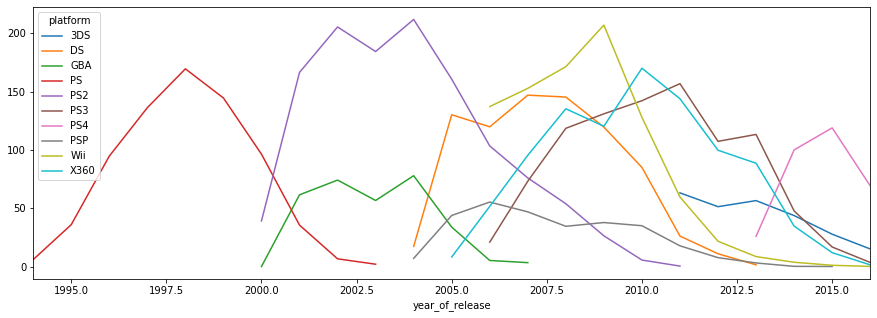

In [38]:
top_10 = data.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by='total_sales').tail(10).index

data.query('platform in @top_10').pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(15, 5))

Исходя из графика можно увидеть, что меньше всего времени просуществовали GBA (Game Boy Advanced) и PS4, остальные платформы существуют около 10 лет, затем сменяются более новыми. Платформами с наибольшими продажами игр, соответственно **наиболее прибыльными** являются PS, PS2 и Wii.

Актуальный период для дальнейшей работы с данными возьмем с 2002 года.

In [39]:
actual_top_data = data.query('platform in @top_10 and 2001 < year_of_release')

In [40]:
actual_top_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,0,0.0,,24.67
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91,8.6,E,23.21
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61,6.3,E,21.82


### Продажи с разбивкой по платформам

Построим график по глобальным продажам топ-10 платформ за акутальный период. Для этого ограничим диапазон значений графика, чтобы сделать его более читаемым.

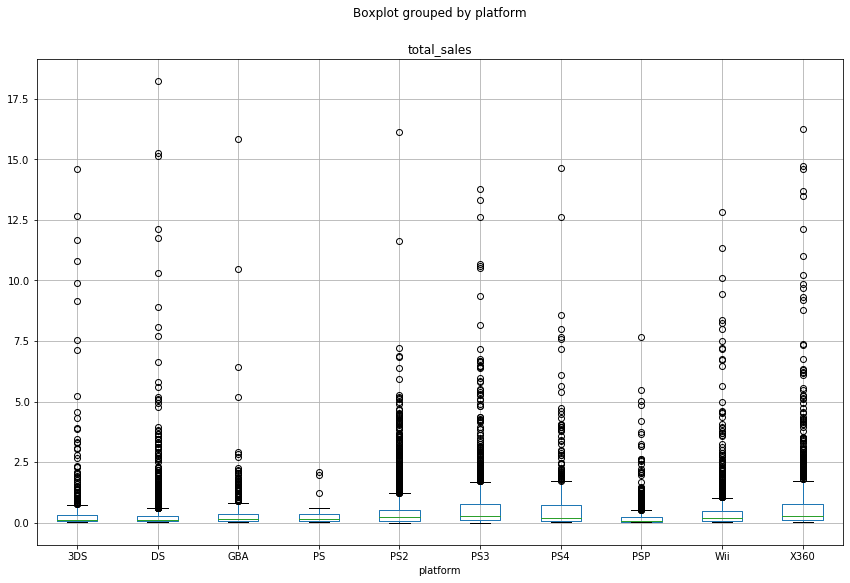

In [41]:
actual_top_data.query('total_sales <= 20').boxplot(column='total_sales', by='platform', figsize=(14, 9))

Судя по графику, наибольшие медианные продажи у PS4 и составляют примерно 3 млн. Наибольшее количество продаж принадлежит платформам DS, Wii, PS3 и Xbob 360. 

### Влияние отзывов на продажи у самых популярных платформ

Решить эту задачу, для начала создадим переменную, в которую запишем предыдущий датасет с топ-10 платформами и применим фильтр.

In [42]:
top_one_data = actual_top_data.query('platform == "Wii"')
top_one_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32


Диаграмма рассеяния по платформе и отзывам критиков.

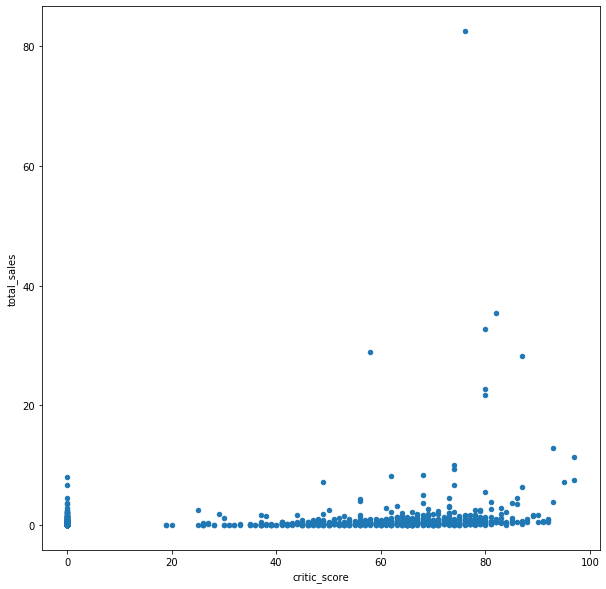

In [43]:
top_one_data.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(10, 10))

На графике видна слабая зависимость между отзывами критиков и продажами. Найдем коэффициент корреляции.

In [44]:
top_one_data['total_sales'].corr(top_one_data['critic_score'])

0.1889438279968329

Из результатов, полученных при расчете корреляции можно сделать вывод, что продажи мало зависят от оценок критиков. Посмотрим на зависимость объема продаж от оценок пользователй.

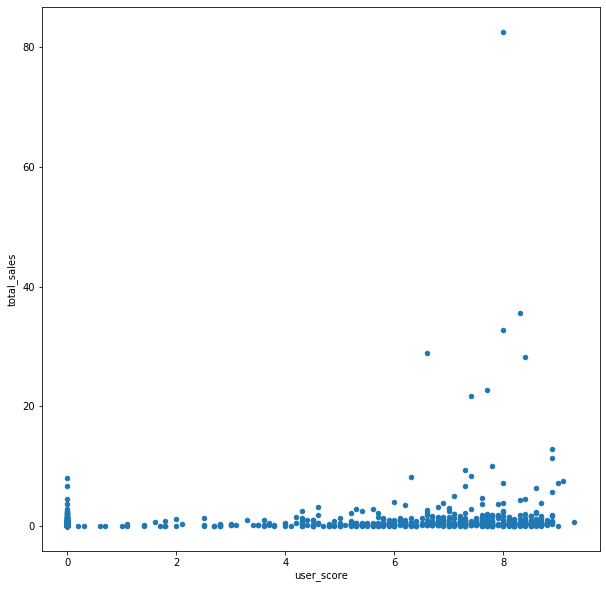

In [45]:
top_one_data.plot(x='user_score', y='total_sales', kind='scatter', figsize=(10, 10))

In [46]:
top_one_data['total_sales'].corr(top_one_data['user_score'])

0.18452742791944807

Полученные результаты говорят о том, что оценки критиков и пользователй мало влияют на объемы продаж игр для Wii.

Проверим влияние оценок критиков на продажи игр для других топовых платформ. Помним, что наибольшее число проданных игр у следующих платформ: DS, Wii, PS3 и Xbox 360.

In [47]:
top_one_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
...,...,...,...,...,...,...,...,...,...,...,...,...
16589,Bomberman,Wii,2008,Puzzle,0.00,0.00,0.01,0.00,0,0.0,,0.01
16626,The Ultimate Battle of the Sexes,Wii,2010,Misc,0.01,0.00,0.00,0.00,0,0.0,T,0.01
16664,Mahou Sensei Negima!? Neo-Pactio Fight!!,Wii,2007,Fighting,0.00,0.00,0.01,0.00,0,0.0,,0.01
16685,Help Wanted: 50 Wacky Jobs (jp sales),Wii,2008,Simulation,0.00,0.00,0.01,0.00,0,0.0,,0.01


platform
3DS     AxesSubplot(0.125,0.125;0.775x0.755)
DS      AxesSubplot(0.125,0.125;0.775x0.755)
GBA     AxesSubplot(0.125,0.125;0.775x0.755)
PS      AxesSubplot(0.125,0.125;0.775x0.755)
PS2     AxesSubplot(0.125,0.125;0.775x0.755)
PS3     AxesSubplot(0.125,0.125;0.775x0.755)
PS4     AxesSubplot(0.125,0.125;0.775x0.755)
PSP     AxesSubplot(0.125,0.125;0.775x0.755)
Wii     AxesSubplot(0.125,0.125;0.775x0.755)
X360    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

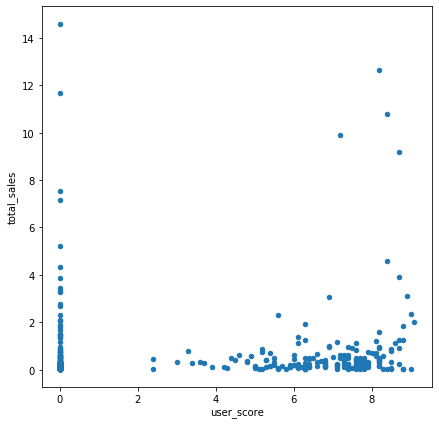

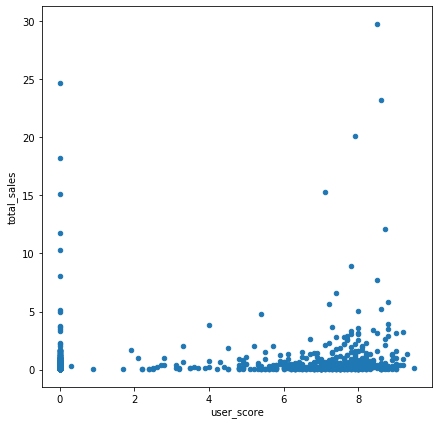

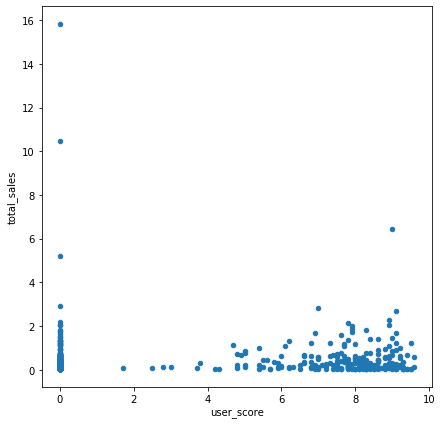

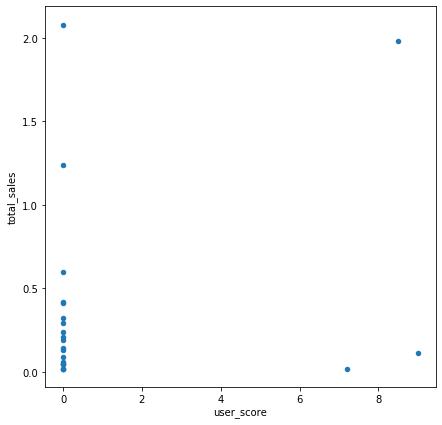

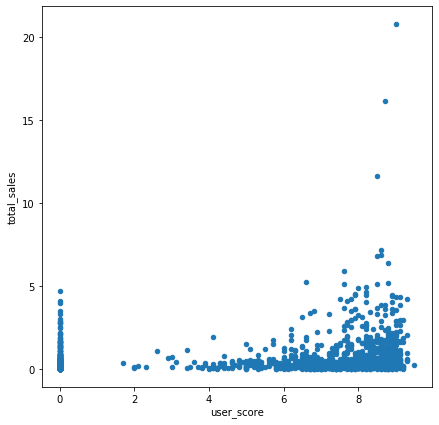

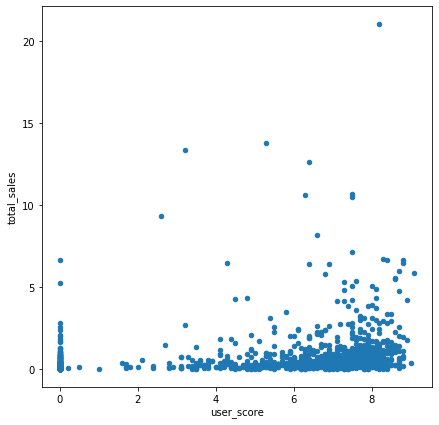

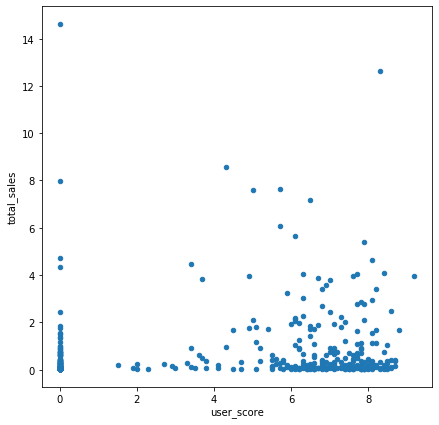

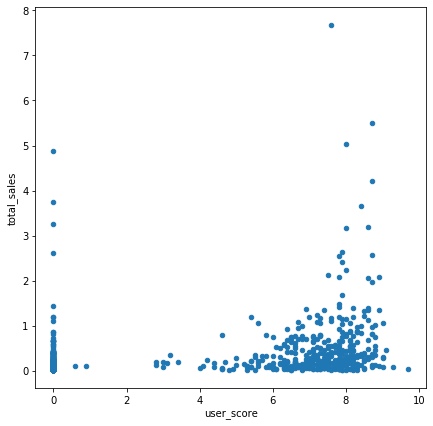

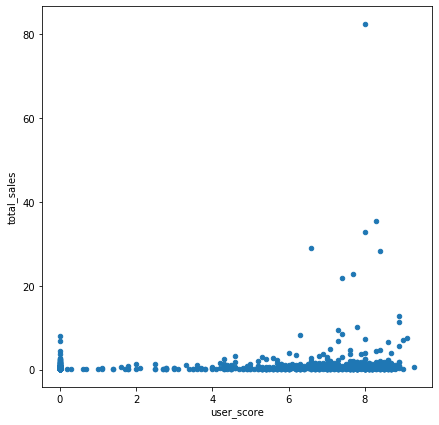

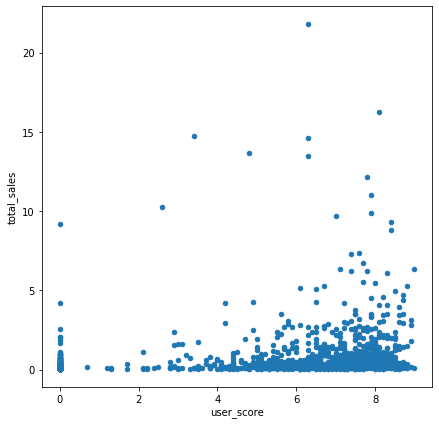

In [48]:
actual_top_data.groupby('platform').plot(x='user_score', y='total_sales', kind='scatter', figsize=(7, 7))

Глядя на графики можно сделать вывод, что на продажи игр на остальных платформах оценки также особо не влияют.

### Влияние жанра на продажи игр

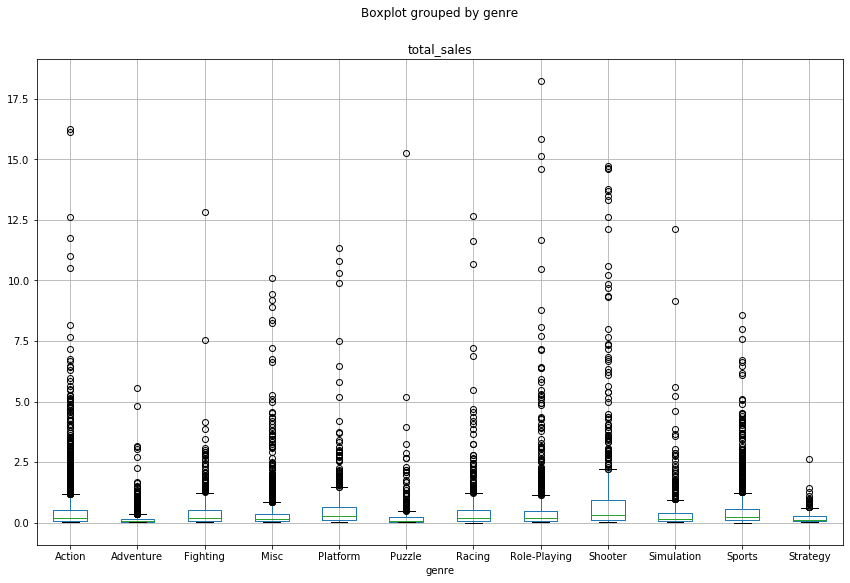

In [49]:
actual_top_data.query('total_sales < 20').boxplot(column='total_sales', by='genre', figsize=(14, 9))

Глядя на график, можно сказать, что играми с наибольшим числом продаж являются игры жанров Action, Misc, Role_Playing и Shooter. Играми с самыми низкими продажами являются игры жанра Adventure, Fighting, Puzzle, симуляторы и стратегии.

### Вывод

Мы провели анализ количества выпущенных игр по годам, проанализировали продажи с разбивкой по платформам, выявили влияние отзывов на продажи у самых популярных платформ а также выяснили, есть ли зависимость между продажами игр и их жанрами.

## Портрет пользователей по регионам

Определим для пользователей каждого региона:
- самые популярные платформы (топ-5). Опишитем различия в долях продаж;
- самые популярные жанры (топ-5);
- в конце выясним, влияет ли рейтинг ESRB на продажи в отдельном регионе.

### Северная Америка

Начнем с Северной Америки. Для того, чтобы определить топ-5 наиболее популярных платформ используем сводную таблицу.

In [50]:
actual_top_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)

,na_sales
platform,
X360,595.74
Wii,486.87
PS2,477.35
PS3,390.13
DS,380.31
GBA,147.83
PS4,108.74
PSP,107.27
3DS,82.65


Наиболее популярной платформой в Северной Америке является Xbox 360 с 567.4 млн. проданных копий игр. Наименее же популярная платформа - PlayStation 3 с 368 млн. проданных копий игр.

Теперь посмотрим на топ-5 самых популярных жанров игр в Северной Америке. Также применим сводную таблицу.

In [51]:
actual_top_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)

,na_sales
genre,
Action,607.23
Sports,466.97
Shooter,375.84
Misc,321.63
Role-Playing,224.47
Platform,192.45
Racing,191.03
Simulation,130.13
Fighting,120.76


Наиболее популярным жанром в Северной Америке является Action с 559.3 млн. проданных копий игр. Наименее популярным - Role-Playing с 200 млн. проданных копий игр. 

Таким же образом поступим с остальными регионами.

### Европа

Определим топ-5 самых популярных платформ на рынке Европы.

In [52]:
actual_top_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()

,eu_sales
platform,
PS3,327.21
PS2,269.62
X360,268.32
Wii,258.32
DS,188.41


Наиболее популярной платформой в Европе является PlayStation 3 с 301.6 млн. проданных копий игр. Наименее же популярная платформа - Nintendo DS  с 188.4 млн. проданных копий игр.

Посмотрим на топ-5 самых популярных жанров в Европе.

In [53]:
actual_top_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()

,eu_sales
genre,
Action,377.66
Sports,281.46
Shooter,227.47
Misc,176.28
Racing,144.47


Наиболее популярным жанром в Европе является Action с 322 млн. проданных копий игр. Наименее популярным - Racing с 136.7 млн. проданных копий игр.

Теперь посмотрим на рынок игр в Японии.

### Япония

Посмотрим на топ-5 популярных платформ.

In [54]:
actual_top_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()

,jp_sales
platform,
DS,175.00
PS2,110.88
3DS,100.62
PS3,79.41
PSP,75.88


Самой популярной платформой в Японии является Nintendo DS cо 175 млн. проданных копий игр. Наименее популярная - Wii с 64.5 млн. проданных копий игр.

Посмотрим на топ-5 жанров.

In [55]:
actual_top_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()

,jp_sales
genre,
Role-Playing,205.24
Action,111.82
Misc,73.05
Sports,62.24
Platform,44.13


Наиболее популярный жанр в Японии - Role-Playing с 179 млн. проданных копий игр, наименее популярный - Platform с 42.8 млн. проданных копий игр.

### Другие регионы

В исследовании присутствуют регионы помимо Северной Амерки, Европы и Японии. Повторим исследование для них.

Топ-5 популярных платформ.

In [56]:
actual_top_data.pivot_table(index='platform', values='other_sales', aggfunc='sum').sort_values(by='other_sales', ascending=False).head()

,other_sales
platform,
PS2,170.11
PS3,134.59
X360,84.88
Wii,77.71
DS,59.04


Наиболее популярной платформой в других регионах является PlayStation 2 с 170 млн. проданных копий игр, наименее популярная в топе-5 - Nintendo DS с 59 млн. проданных копий игр.

Топ-5 популярных жанров.

In [57]:
actual_top_data.pivot_table(index='genre', values='other_sales', aggfunc='sum').sort_values(by='other_sales', ascending=False).head()

,other_sales
genre,
Action,156.80
Sports,112.29
Shooter,86.02
Misc,66.62
Racing,59.39


Также как и в предыдущих случаях, наиболее популярным жанром является Action со 138.7 млн. проданных копий игр. Наименее популярный жанр - Racing c 57.8 млн. проданных копий игр.

### Построение графиков по регионам

Построим графики продаж игр с разбивкой по платформам и регионам. Графики располагаются по порядку - Северная Америка, Европа, Япония, другие регионы.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3611378390>,
      dtype=object)

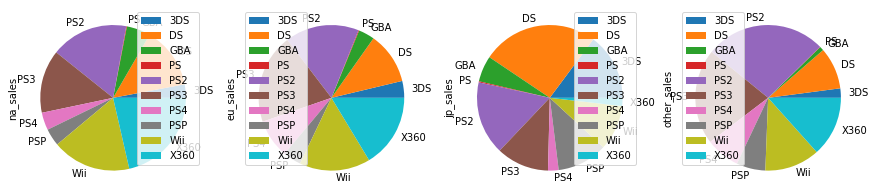

In [58]:
actual_top_data.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().plot.pie(subplots=True, figsize=(15, 10))

Графики подтверждают и наглядно визуализируют выводы при построении сводных таблиц.

Посмотрим на количество проданных игр в зависимости от их рейтинга.

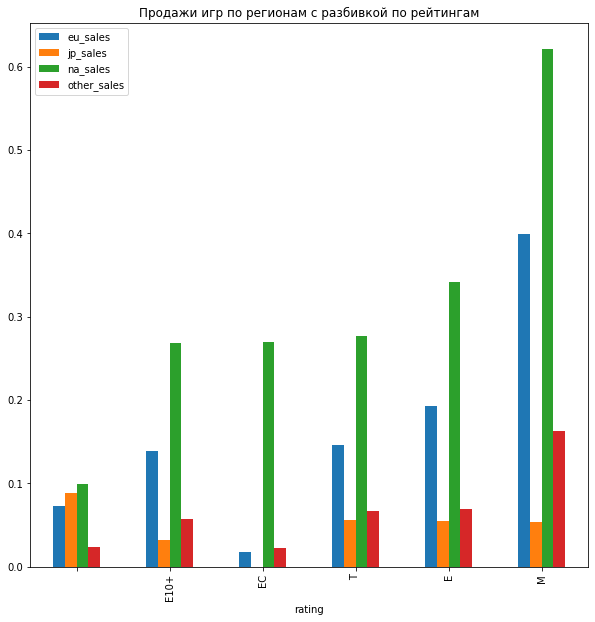

In [59]:
(actual_top_data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'])
 .sort_values('na_sales').plot(kind='bar', title='Продажи игр по регионам с разбивкой по рейтингам', figsize=(10, 10))
)

Посмотрим на график. Наибольшее количество игр, проданных в Америке - с рейтингом M; наибольшее количество игр, проданных в Европе - также с рейтингом М; наибольшее количество игр, проданных в Японии - с рейтингом Т.

### Вывод

Мы проанализировали рынки видеоигр в Северной Америке, Европе, Японии и других регионах. Нашли для каждого региона топ-5 самых популярных платформ, топ-5 самых популярных жанров а также выяснили, влияет ли рейтинг ESRB на продажи игр по каждому из перечисленных регионов.

## Проверка гипотез

На данном этапе нам предствоит проверить две гипотезы:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Проверка первой гипотезы

Сформулируем нулевую и альтернативную гипотезы для первого случая.
- Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC **не различаются**;
- альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC **различаются**.

Для проверки гипотез применим стат-тест для проверки равенства двух неравных массивов данных.

In [60]:
xbox_data = data[data['platform'] == 'XOne']['user_score']

In [70]:
xbox_data.mean()

4.805263157894737

In [61]:
pc_data = data[data['platform'] == 'PC']['user_score']

In [71]:
pc_data.mean()

5.598526315789474

Проверим полученные датасеты на пропуски. Чтобы стат-тест сработал, пропусков быть не должно.

In [62]:
xbox_data.isna().sum()

0

In [63]:
pc_data.isna().sum()

0

Пропусков в данных нет, значит стат-тест точно покажет результат.

In [64]:
alpha = 0.05

results = st.ttest_ind(xbox_data, pc_data)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевую гипотезу отвергнуть нельзя')

p-значение: 0.0004652379265680001
Отвергаем нулевую гипотезу


Исходя из результатов стат-теста можно сделать вывод, что нулевая гипотеза отвергнута, соответствуенно средние пользовательские рейтинги платформ Xbox One и PC различаются.

Перейдем к проверке второй гипотезы.

### Проверка второй гипотезы

Сформулируем нулевую и альтернативную гипотезы:
- средние пользовательские рейтинги жанров Action и Sports **не различаются**;
- средние пользовательские рейтинги жанров Action и Sports **различаются**.

In [65]:
action_data = data[data['genre'] == 'Action']['user_score']

In [66]:
sports_data = data[data['genre'] == 'Sports']['user_score']

Проверим полученные массивы на пропуски.

In [67]:
action_data.isna().sum()

0

In [68]:
sports_data.isna().sum()

0

Пропусков в данных нет, значит стат-тест сработает.

In [69]:
alpha = 0.05

results = st.ttest_ind(action_data, sports_data)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевую гипотезу отвергнуть нельзя')

p-значение: 1.8150403493636263e-09
Отвергаем нулевую гипотезу


По результатам стат-теста можно сделать вывод, что средние пользовательские рейтинги жанров Action и Sports различаются.

### Вывод

Мы завершили этап проверки гипотез. Обе гипотезы были отвергнуты.

## Общий вывод

Было проведено масштабное исследование рынка видеоигр разных регионов. Данные для исследования были преобработаны, в исходную таблицу добавлен столбец с информацией о общих продажах по всем регионам. Далее был проведен исследовательский анализ, в ходе которого было сделано следующее:

- проведя анализ количества выпущенных игр по годам было выяснено, что наибольшее число игр (более 4000) были выпущены в 2010-11 годах, а наименьшее количество игр - в 1990 году;
- проведен анализ по платформам. В ходе него было выяснено, что меньше всего времени просуществовали GBA (Game Boy Advanced) и PS4, остальные платформы существуют около 10 лет, затем сменяются более новыми. Платформами с наибольшими продажами игр, соответственно наиболее прибыльными являются PS, PS2 и Wii;
- построен график с разбивкой продаж по платформам. Судя по графику, наибольшие медианные продажи у PS4 и составляют примерно 3 млн. Наибольшее количество продаж принадлежит платформам DS, Wii, PS3 и Xbob 360;
- был построен график распределения продаж игр по жанрам. Судя по графику, можно сказать, что играми с наибольшим числом продаж являются игры жанров Action, Misc, Role_Playing и Shooter. Играми с самыми низкими продажами являются игры жанра Adventure, Fighting, Puzzle, симуляторы и стратегии;
- был проведен анализ рынков видеоигр в разных регионах. Чаще всего встречающийся возрастной рейтинг - M; наиболее популярные платформы - PS3 и Xbox 360; наиболее популярный жанр - Action.

В конце исследования были проверены две гипотезы:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

В результате работы стат-тестов обе гипотезы были отвергнуты.

***Отвечая на вопрос*** "какие факторы определяют успешность игры" - наибольшим успехом будет пользоваться игра с рейтингом М, выпущенная на актуальных игровых консолях (последние PS, Xbox) а также на платформе Wii, таким образом будет охвачен наиболее широкий рынок.